knn算法是监督学习中一种懒惰的算法，计算新数据到训练数据特征值之间的距离，然后选取k个最近邻进行分类判断。主要有3个主要的因素：距离的计算，k值的选择，分类的规则。

面试中针对此类算法问到的问题：     
第一题：简述KNN最近邻分类算法的过程？

1.计算训练样本和测试样本中每个样本点的距离（常见的距离度量有欧式距离，马氏距离等）； 

2.对上面所有的距离值进行排序； 

3.选前k个最小距离的样本； 

4.根据这k个样本的标签进行投票，得到最后的分类类别。

第二题：在k-means或kNN，我们是用欧氏距离来计算最近的邻居之间的距离。为什么不用曼哈顿距离？

曼哈顿距离只计算水平或垂直距离，有维度的限制。另一方面，欧氏距离可用于任何空间的距离计算问题。因为，数据点可以存在于任何空间，欧氏距离是更可行的选择。例如：想象一下国际象棋棋盘，象或车所做的移动是由曼哈顿距离计算的，因为它们是在各自的水平和垂直方向做的运动。


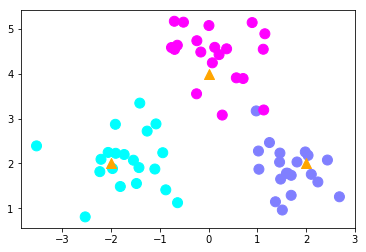

In [1]:
 #生成已标记的数据集
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets.samples_generator import  make_blobs
centers = [[-2,2],[2,2],[0,4]]
data,target = make_blobs(n_samples=60,centers=centers,random_state=0,cluster_std=0.6)
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
c=np.array(centers)
ax1.scatter(data[:,0],data[:,1],c=target,s=100,cmap='cool')
ax1.scatter(c[:,0],c[:,1],s=100,marker='^',c='orange')




In [2]:
#使用KNeighborsClassifier 对算法进行训练，参数为5
from sklearn.neighbors import KNeighborsClassifier
k = 5
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(data,target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [3]:
#对一个新样本进行预测
x_sample = [[0,2]]
y_sample = clf.predict(x_sample)
neighbors = clf.kneighbors(x_sample,return_distance=False)
y_sample
neighbors

array([[16, 20, 48,  6, 23]], dtype=int64)

使用k-近邻算法进行回归拟合

In [4]:
import numpy as np
#生成数据
n_dots = 40
x = 5*np.random.rand(n_dots,1)
y = np.cos(x).ravel()
y += 0.2*np.random.rand(n_dots)-1

In [5]:
#使用KNeighborsRegressor 训练模型
from sklearn.neighbors import KNeighborsRegressor
k = 5
knn = KNeighborsRegressor(k)
knn.fit(x,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [6]:
#生成足够密集的点并进行预测
t = np.linspace(0,5,500)[:,np.newaxis]  #增加维度
y_pred = knn.predict(t)
knn.score(x,y)

0.9795158873508056

(-0.25, 5.25, -2.055822424649916, 0.2052677250024373)

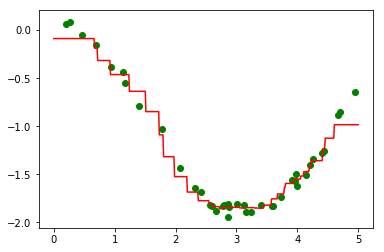

In [7]:
#构成拟合曲线
fig = plt.figure()
ax2 = fig.add_subplot(1,1,1)
ax2.scatter(x,y,c='g',label='data')
ax2.plot(t,y_pred,c='r')
ax2.axis('tight')


实例:糖尿病人预测

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier

In [9]:
data = pd.read_csv('diabetes.csv')
data.shape
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
data.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

In [11]:
x = data.iloc[:,0:8]
y = data.iloc[:,8]

In [12]:
#把数据集分为训练集和测试集
x_train,x_test,y_train,y_text = train_test_split(x,y,test_size=0.2)

In [14]:
#模型的比较
models = []
models.append(('knn',KNeighborsClassifier(n_neighbors=2)))
models.append(('knn with weight',KNeighborsClassifier(n_neighbors=2,weights='distance')))
models.append(('radius bieghtbors',RadiusNeighborsClassifier(n_neighbors=2,radius=500)))

In [17]:
#分别训练3个模型
results = []
for name,model in models:
    model.fit(x_train,y_train)
    results.append((name,model.score(x_test,y_text)))
print(results)

[('knn', 0.6753246753246753), ('knn with weight', 0.6818181818181818), ('radius bieghtbors', 0.5844155844155844)]


In [22]:
#为了准确的对比算法的准确性？一个方法是多次随机分配训练集和交叉验证集，然后求模型的评分的平均值
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

results = []
for name,model in models:
    kfold = KFold(n_splits = 10)
    cv_result = cross_val_score(model,x,y,cv=kfold)
    results.append((name,cv_result))
for i in range(len(results)):
    print('name:{},cross_val_score:{}'.format(results[i][0],results[i][1].mean()))

name:knn,cross_val_score:0.7147641831852358
name:knn with weight,cross_val_score:0.6770505809979495
name:radius bieghtbors,cross_val_score:0.6497265892002735


In [25]:
#特征选择及数据可视化
from sklearn.feature_selection import SelectKBest
selector = SelectKBest(k = 2)
x_new = selector.fit_transform(x,y)
x_new[0:5]
results = []
for name,model in models:
    kfold = KFold(n_splits = 10)
    cv_result = cross_val_score(model,x_new,y,cv=kfold)
    results.append((name,cv_result))
for i in range(len(results)):
    print('name:{},cross_val_score:{}'.format(results[i][0],results[i][1].mean()))

C:\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


name:knn,cross_val_score:0.725205058099795
name:knn with weight,cross_val_score:0.6900375939849623
name:radius bieghtbors,cross_val_score:0.6510252904989747
